Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
import pathlib

# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration\Test")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds =tf.keras.preprocessing.image_dataset_from_directory(
data_dir_train,
validation_split=0.2,
subset='training',
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size) 

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir_train,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

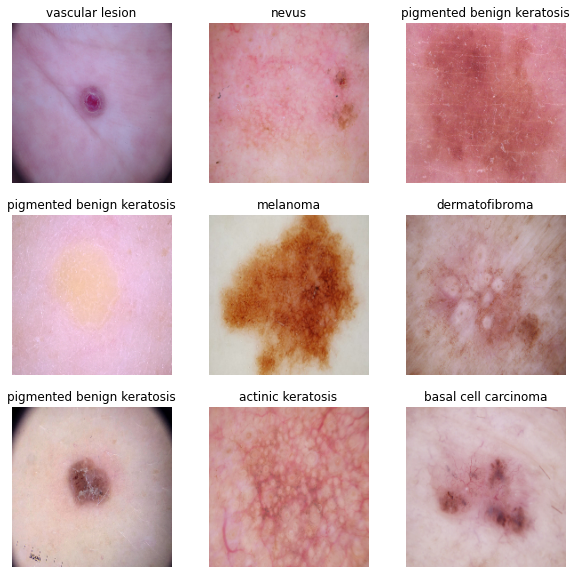

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here
num_classes=9

model=Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 30s 429ms/step - loss: 1.9195 - accuracy: 0.2919 - val_loss: 1.5982 - val_accuracy: 0.4720
Epoch 2/20
56/56 [==============================] - 37s 660ms/step - loss: 1.5231 - accuracy: 0.4727 - val_loss: 1.4485 - val_accuracy: 0.5235
Epoch 3/20
56/56 [==============================] - 38s 688ms/step - loss: 1.3730 - accuracy: 0.5301 - val_loss: 1.3593 - val_accuracy: 0.5503
Epoch 4/20
56/56 [==============================] - 44s 777ms/step - loss: 1.3039 - accuracy: 0.5485 - val_loss: 1.3524 - val_accuracy: 0.5459
Epoch 5/20
56/56 [==============================] - 39s 691ms/step - loss: 1.2109 - accuracy: 0.5798 - val_loss: 1.3445 - val_accuracy: 0.5459
Epoch 6/20
56/56 [==============================] - 38s 683ms/step - loss: 1.1984 - accuracy: 0.5670 - val_loss: 1.6443 - val_accuracy: 0.4765
Epoch 7/20
56/56 [==============================] - 38s 676ms/step - loss: 1.1551 - accuracy: 0.5910 - val_loss: 1.3254 - val_accuracy: 0.5615

### Visualizing training results

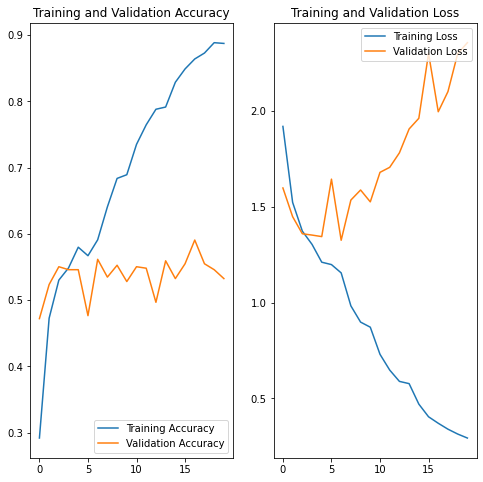

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
Inference:
In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 55% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable — a sign of overfitting.

Overfitting: 
When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.


### Data Augumentation

Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

We will implement data augmentation using experimental Keras Preprocessing Layers.

In [16]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

In [17]:
# After you have analysed the model fit history for presence of underfit or overfit, choosing an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

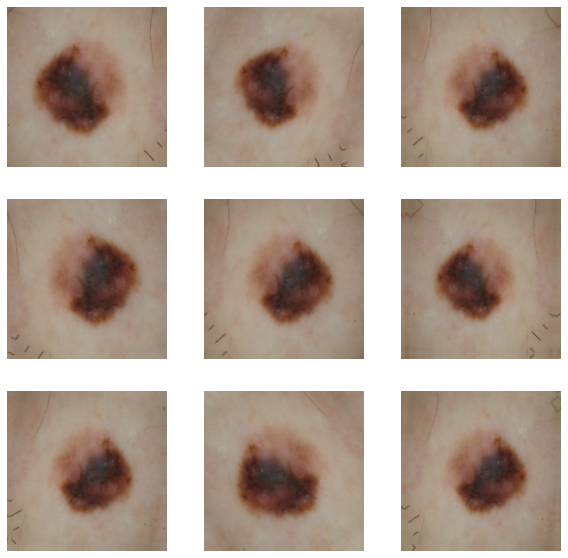

In [18]:
# Visualizing how my augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use  Dropout layer as there is an evidence of overfitting in the above findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compiling the model

In [20]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

### Training the model

In [22]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 49s 836ms/step - loss: 2.0614 - accuracy: 0.2109 - val_loss: 1.9349 - val_accuracy: 0.2908
Epoch 2/20
56/56 [==============================] - 47s 844ms/step - loss: 1.7764 - accuracy: 0.3633 - val_loss: 1.6684 - val_accuracy: 0.4541
Epoch 3/20
56/56 [==============================] - 47s 845ms/step - loss: 1.6299 - accuracy: 0.4163 - val_loss: 1.5973 - val_accuracy: 0.4318
Epoch 4/20
56/56 [==============================] - 240s 4s/step - loss: 1.5167 - accuracy: 0.4615 - val_loss: 1.4991 - val_accuracy: 0.4966
Epoch 5/20
56/56 [==============================] - 47s 832ms/step - loss: 1.4960 - accuracy: 0.4648 - val_loss: 1.5063 - val_accuracy: 0.4877
Epoch 6/20
56/56 [==============================] - 46s 830ms/step - loss: 1.3925 - accuracy: 0.5140 - val_loss: 1.4469 - val_accuracy: 0.5123
Epoch 7/20
56/56 [==============================] - 46s 827ms/step - loss: 1.3742 - accuracy: 0.5134 - val_loss: 1.4792 - val_accuracy: 0.4698
E

### Visualizing the results

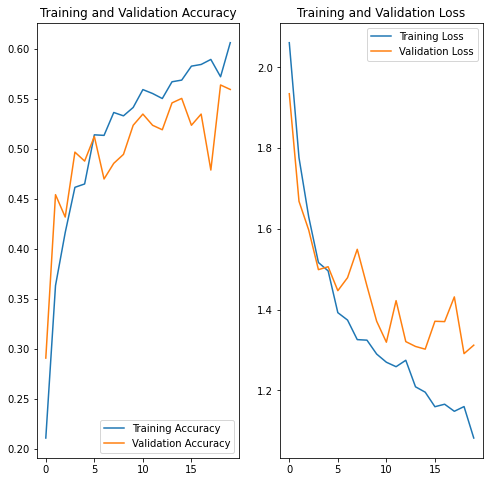

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
Inference:
From the above graphs we can see that the overfitting has been reduced effectively after inclusion of data augumentation and dropout layer. The Accuracy graph shows that the gap between the training and validation accuracy has reduced significantly. 
The Loss graph, the gap between the training and validation loss functions have been reduced. the accuracy has increased to around 60%


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

### Finding the count of number of jpg's in each class

In [24]:
from pathlib import Path

In [25]:
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis")
print(data_dir_train)
paths1 = Path(data_dir_train).glob('**/*.jpg')
ak=len(list(paths1))
ak

Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis


114

In [26]:
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma")
print(data_dir_train)
paths2 = Path(data_dir_train).glob('**/*.jpg')
bcc=len(list(paths2))
bcc

Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma


376

In [27]:
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma")
print(data_dir_train)
paths3 = Path(data_dir_train).glob('**/*.jpg')
d=len(list(paths3))
d

Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma


95

In [28]:
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma")
print(data_dir_train)
paths4 = Path(data_dir_train).glob('**/*.jpg')
m=len(list(paths4))
m

Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma


438

In [29]:
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus")
print(data_dir_train)
paths5 = Path(data_dir_train).glob('**/*.jpg')
n=len(list(paths5))
n

Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus


357

In [30]:
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis")
print(data_dir_train)
paths6 = Path(data_dir_train).glob('**/*.jpg')
pbk=len(list(paths6))
pbk

Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis


462

In [31]:
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis")
print(data_dir_train)
paths7 = Path(data_dir_train).glob('**/*.jpg')
sk=len(list(paths7))
sk

Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis


77

In [32]:
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma")
print(data_dir_train)
paths8 = Path(data_dir_train).glob('**/*.jpg')
scc=len(list(paths8))
scc

Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma


181

In [33]:
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion")
print(data_dir_train)
paths9 = Path(data_dir_train).glob('**/*.jpg')
vl=len(list(paths9))
# vl1)
vl

Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion


139

In [34]:
Total=ak+bcc+d+m+n+pbk+sk+scc+vl

In [35]:
hp=int(pbk/Total)
hp

0

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### As we can see from the above counts, "seborrheic keratosis" class has the least number of samples.

#### - Which classes dominate the data in terms proportionate number of samples?
#### From above we can see that the class "pigmented benign keratosis" has the most number of samples.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [36]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [37]:
path_to_training_dataset=os.getcwd()
path_to_training_dataset=path_to_training_dataset+"/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
print(path_to_training_dataset)

C:\Users\rabip\OneDrive\デスクトップ\Assignment CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train


In [38]:

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset+"/" + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to C:\Users\rabip\OneDrive\デスクトップ\Assignment CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B694AF48B0>: 100%|██████████| 500/500 [00:11<00:00, 42.72 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to C:\Users\rabip\OneDrive\デスクトップ\Assignment CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B694F37580>: 100%|██████████| 500/500 [00:12<00:00, 40.14 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to C:\Users\rabip\OneDrive\デスクトップ\Assignment CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B694A606A0>: 100%|██████████| 500/500 [00:11<00:00, 43.23 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to C:\Users\rabip\OneDrive\デスクトップ\Assignment CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1B694AB7310>: 100%|██████████| 500/500 [00:58<00:00,  8.54 Samples/s] 
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to C:\Users\rabip\OneDrive\デスクトップ\Assignment CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x1B694A6DCD0>: 100%|██████████| 500/500 [01:03<00:00,  7.82 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to C:\Users\rabip\OneDrive\デスクトップ\Assignment CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B694A8BEE0>: 100%|██████████| 500/500 [00:11<00:00, 43.15 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to C:\Users\rabip\OneDrive\デスクトップ\Assignment CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B694904FA0>: 100%|██████████| 500/500 [00:25<00:00, 19.45 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to C:\Users\rabip\OneDrive\デスクトップ\Assignment CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B68C6E0DC0>: 100%|██████████| 500/500 [00:11<00:00, 43.79 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to C:\Users\rabip\OneDrive\デスクトップ\Assignment CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B69461D7F0>: 100%|██████████| 500/500 [00:11<00:00, 45.33 Samples/s]                  


In [39]:
data_dir_train=pathlib.Path(path_to_training_dataset)

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [40]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [41]:
import glob

In [42]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Users\\rabip\\OneDrive\\デスクトップ\\Assignment CNN\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_4176e735-4b47-4b01-a07b-23dfdf25af7a.jpg',
 'C:\\Users\\rabip\\OneDrive\\デスクトップ\\Assignment CNN\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_4a27c606-3c6c-4dd3-95ad-759f970587d7.jpg',
 'C:\\Users\\rabip\\OneDrive\\デスクトップ\\Assignment CNN\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_93bfe076-a16f-4cae-a258-a6a47a1d505d.jpg',
 'C:\\Users\\rabip\\OneDrive\\デスクトップ\\Assignment CNN\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_95012c83-a670-462c-8fa2-0f7ad611d6c1.jpg',
 'C:\\Users\\rabip\\OneDrive\\デスクトップ\\Assignment

In [43]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [44]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [46]:
# df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])# new_df = original_df.append(df2)

In [47]:
# new_df['Label'].value_counts()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [48]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [49]:
data_dir_train=os.path.join(data_dir_train)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset = "training",## Todo choose the correct parameter value, so that only training data is refered to,,
    image_size=(180, 180),
    batch_size=batch_size )

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [50]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [51]:
## your code goes here
normalization_layer=layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds=train_ds.map(lambda x, y: (normalization_layer(x),y))
image_batch, labels_batch=next(iter(normalized_ds))
first_image=image_batch[0]

print(np.min(first_image), np.max(first_image))

0.31421626 0.94068635


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [52]:
## your code goes here
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

#### **Todo:**  Train your model

In [53]:
epochs = 30

history = model.fit(
train_ds,
validation_data=val_ds,
epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 175s 1s/step - loss: 1.2381 - accuracy: 0.5274 - val_loss: 1.2486 - val_accuracy: 0.5278
Epoch 2/30
169/169 [==============================] - 172s 1s/step - loss: 1.1628 - accuracy: 0.5504 - val_loss: 1.1064 - val_accuracy: 0.5627
Epoch 3/30
169/169 [==============================] - 164s 966ms/step - loss: 1.1574 - accuracy: 0.5618 - val_loss: 1.1588 - val_accuracy: 0.5627
Epoch 4/30
169/169 [==============================] - 169s 992ms/step - loss: 1.0774 - accuracy: 0.5853 - val_loss: 1.0953 - val_accuracy: 0.5835
Epoch 5/30
169/169 [==============================] - 162s 949ms/step - loss: 1.0464 - accuracy: 0.6018 - val_loss: 1.0996 - val_accuracy: 0.5843
Epoch 6/30
169/169 [==============================] - 168s 989ms/step - loss: 1.0041 - accuracy: 0.6174 - val_loss: 0.9575 - val_accuracy: 0.6355
Epoch 7/30
169/169 [==============================] - 164s 961ms/step - loss: 0.9637 - accuracy: 0.6372 - val_loss: 1.0438 - val_a

#### **Todo:**  Visualize the model results

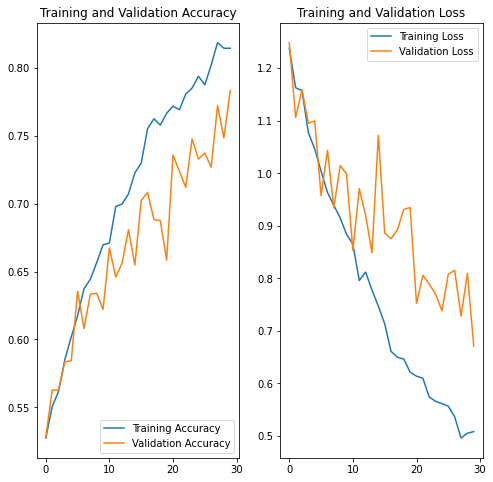

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



##### Analyzing the results here. 
From the above we can see that the training and validation Accuracy has increased in a good amount keeping the gap more or less the same as the previous model. We can also see that loss for validation follows the same as trend as the training trend. Hence, we have got rid of overfitting.
Yes, class rebalance helped.
Here, if we increase the number of epoch to more than 30 epochs, the results will be better.